In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Sine/Cosine Regression Model
$$
f(x) = a\cos(\pi x) + b\sin(\pi  x)
$$

로 한정하지말고, Neural Network Model을 사용해 봅니다.

### 데이터 생성
데이터는 위의 함수를 이용해서 생성합니다. Train용과 Test용 2가지를 50개씩 생성합니다.

In [2]:
np.random.seed(410)
xxx = np.linspace(-1,1,500)# for drawing
xx = np.linspace(-1,1,50)
yy = 1.0 * np.cos(np.pi * xx) + 1.0 * np.sin(np.pi*xx) + 0.2 * (2 * np.random.rand(len(xx)) - 1)
yy_test = 1.0 * np.cos(np.pi * xx) + 1.0 * np.sin(np.pi*xx) + + 0.2 * (2 * np.random.rand(len(xx)) - 1)

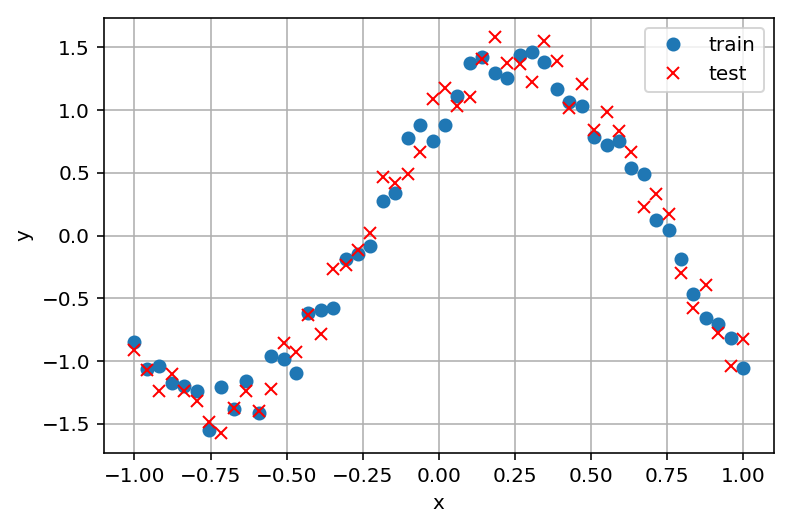

In [3]:
plt.plot(xx, yy, 'o', label='train')
plt.plot(xx, yy_test, 'xr', label='test')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [4]:
features = np.array([[xval] for xval in xx])
print(features.shape)
labels = yy

(50, 1)


### Neural Network Model

모델 구성은 다음과 같습니다.

1. Hidden Layer 1 : $h_1 = \sigma(xW_1 + b_1) $
1. Hidden Layer 2 : $h_2 = \sigma(h_1W_2 + b_2) $
1. Output Layer : $\hat{y} = h_2W_3 + b_3  $

In [5]:
import tensorflow as tf
num_hidden1 = 10
num_hidden2 = 4
x = tf.placeholder(tf.float32, shape=[None, 1])

tf.set_random_seed(180410)

# TODO 1 : Variable for hidden layer 1
W1 = tf.Variable(tf.random_normal([1, num_hidden1]))
b1 = tf.Variable(tf.random_normal([num_hidden1]))

# TODO 2 : Variable for hidden layer 2
W2 = tf.Variable(tf.random_normal([num_hidden1, num_hidden2]))
b2 = tf.Variable(tf.random_normal([num_hidden2]))

# TODO 3 : Variable for output layer
W3 = tf.Variable(tf.random_normal([num_hidden2, 1]))
b3 = tf.Variable(tf.random_normal([1]))

# TODO 4 : Hidden layer 1 model
hidden1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
# TODO 5 : Hidden layer 2 model
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1, W2) + b2)

# Final model
model = tf.matmul(hidden2, W3) + b3

## Loss function
$$
loss = \frac{1}{m}\sum_{i=1}^m |y_i-\hat{y_i}|^2
$$

In [6]:
y = tf.placeholder(tf.float32, shape=[None, 1])

loss = tf.reduce_mean(tf.square(y - model))

optimizer = tf.train.AdamOptimizer()
train = optimizer.minimize(loss)

## Gradient Descent

In [7]:
def plot_model(curr_loss, curr_test_loss, prediction, i):
    plt.plot(xx, yy, 'o')
    plt.plot(xx, yy_test, 'o')
    plt.plot(xxx, prediction, '-r')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('{0}'.format(i))
    plt.show()

0 2.0045006 2.1156309


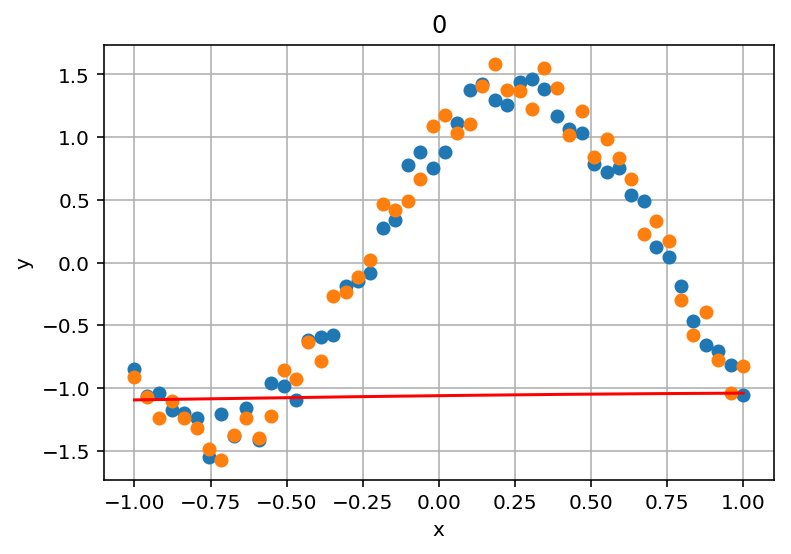

1000 0.57270586 0.6139161
2000 0.06348365 0.07672535
3000 0.022863407 0.03259408
4000 0.020124199 0.0296575
5000 0.018574156 0.028279005
6000 0.017389469 0.026985945
7000 0.015392387 0.024537921
8000 0.012785669 0.021156197
9000 0.011629683 0.019714745
10000 0.011310356 0.019520797


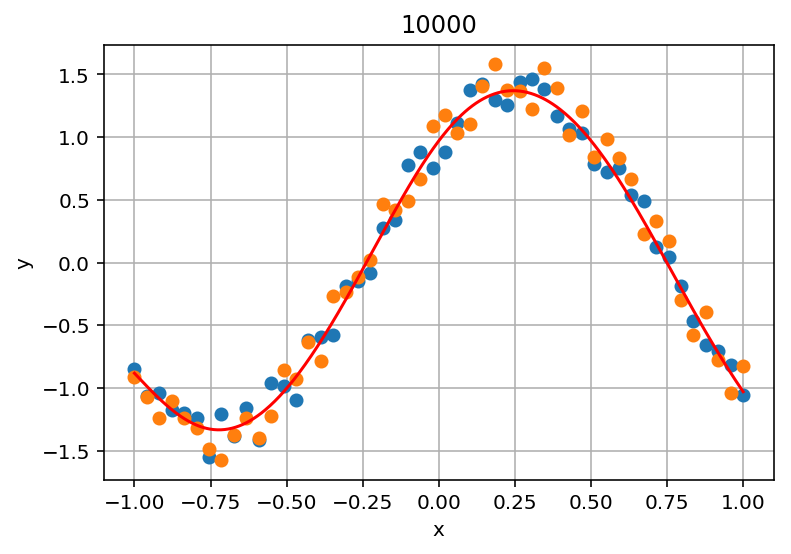

11000 0.011200909 0.019562654
12000 0.011167521 0.019596692
13000 0.011146899 0.019599132
14000 0.011129123 0.019587131
15000 0.011111393 0.01956924
16000 0.011089793 0.019554842
17000 0.011058729 0.019524807
18000 0.011005781 0.019493092
19000 0.010904896 0.01944409
20000 0.010692085 0.019440323


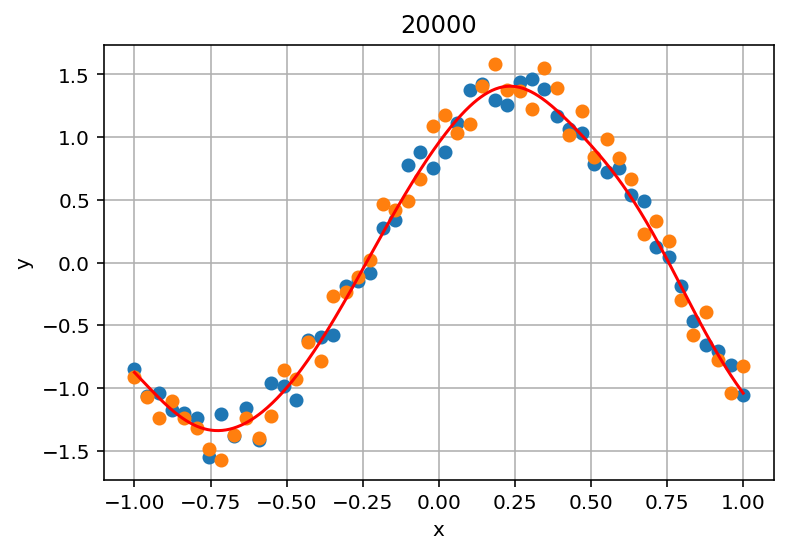

21000 0.010396946 0.019384276
22000 0.010075165 0.019373795
23000 0.009789338 0.019459706
24000 0.009659339 0.019704727
25000 0.009557693 0.019932212
26000 0.00942089 0.020160345
27000 0.009208827 0.020380802
28000 0.008862893 0.020723326
29000 0.008440728 0.021230388
30000 0.008075243 0.021905636


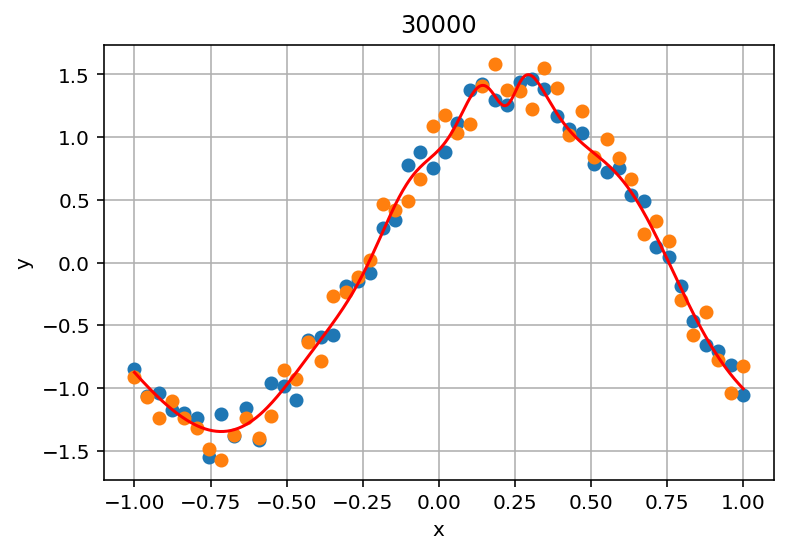

31000 0.0077775656 0.02273386
32000 0.0075550713 0.02350946
33000 0.007393295 0.024153208
34000 0.0072701974 0.024675071
35000 0.0071758223 0.025192006
36000 0.0071001267 0.02553566
37000 0.0070382506 0.025932902
38000 0.006980076 0.026187664
39000 0.0069236886 0.026470568
40000 0.0068770256 0.02673697


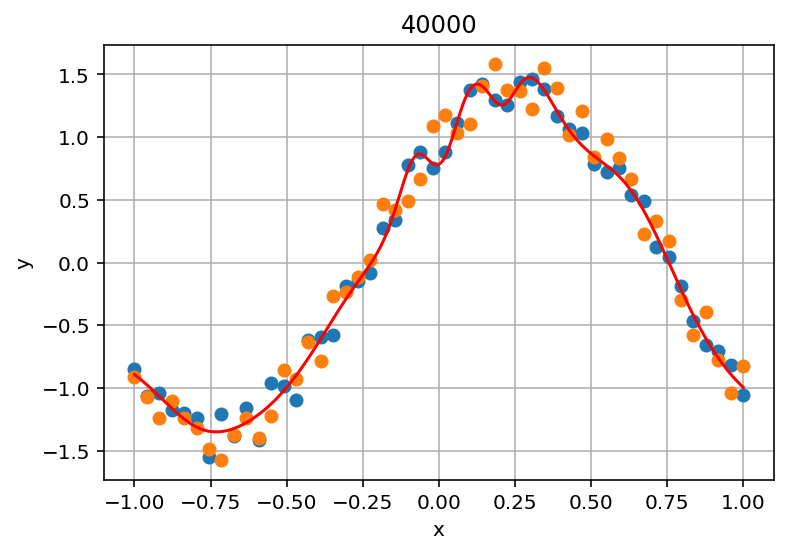

41000 0.006843594 0.026806492
42000 0.0068223802 0.026893837
43000 0.006806786 0.026981153
44000 0.0067944443 0.027047897
45000 0.006784098 0.027074616
46000 0.0067751426 0.027092842
47000 0.006767037 0.027109826
48000 0.0067594387 0.02712393
49000 0.00675215 0.027119553
50000 0.0067449342 0.027117787


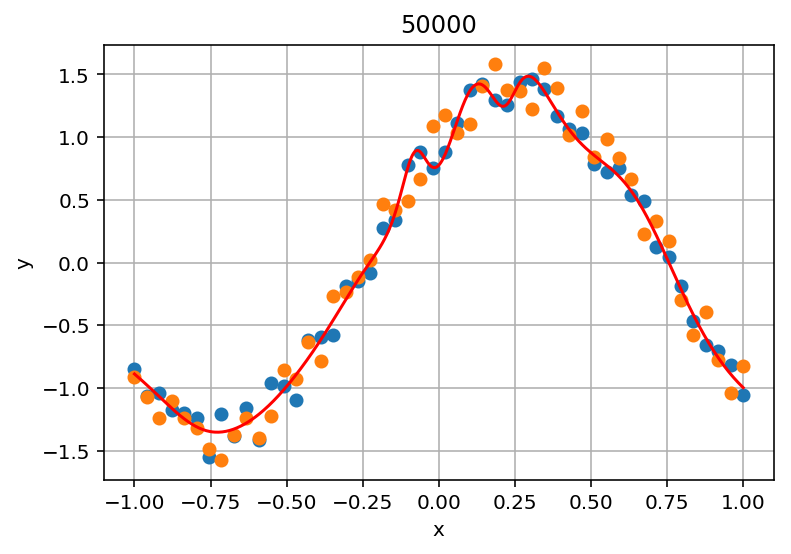

51000 0.0067378213 0.027118515
52000 0.00673071 0.027111545
53000 0.0067236745 0.027109135
54000 0.006717098 0.027137443
55000 0.006710278 0.027097318
56000 0.00670416 0.02709508
57000 0.006698538 0.027091634
58000 0.006693386 0.027102733
59000 0.006691507 0.027196027
60000 0.006684052 0.027086997


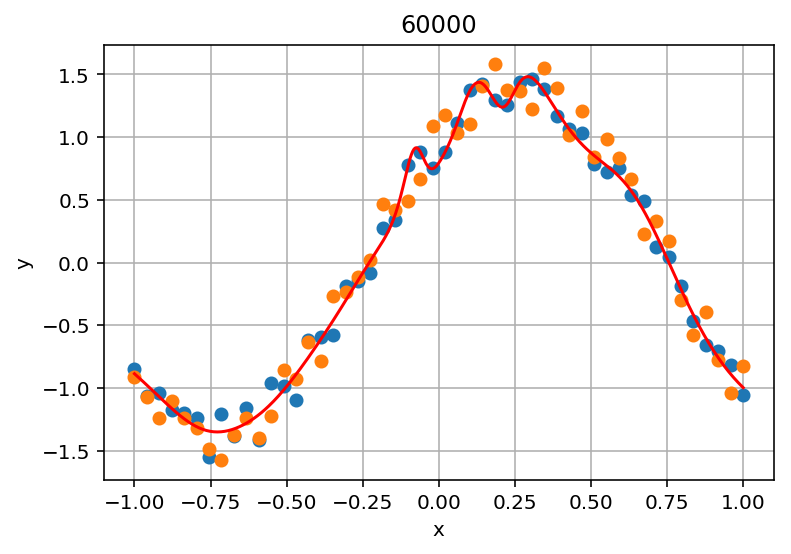

In [8]:
losses = []
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for i in range(60001):
    sess.run(train, feed_dict={x:features, y:labels.reshape(-1,1)})
    curr_loss = sess.run(loss, feed_dict={x:features, y:labels.reshape(-1,1)})
    curr_test_loss = sess.run(loss, feed_dict={x:features, y:yy_test.reshape(-1,1)})
    losses.append([curr_loss, curr_test_loss])
    if i % 1000 == 0:
        print(i, curr_loss, curr_test_loss)
    if i % 10000 == 0:
        prediction = sess.run(model, feed_dict={x:xxx.reshape(-1,1), y:labels.reshape(-1,1)})
        plot_model(curr_loss, curr_test_loss, prediction, i)

losses = np.array(losses)

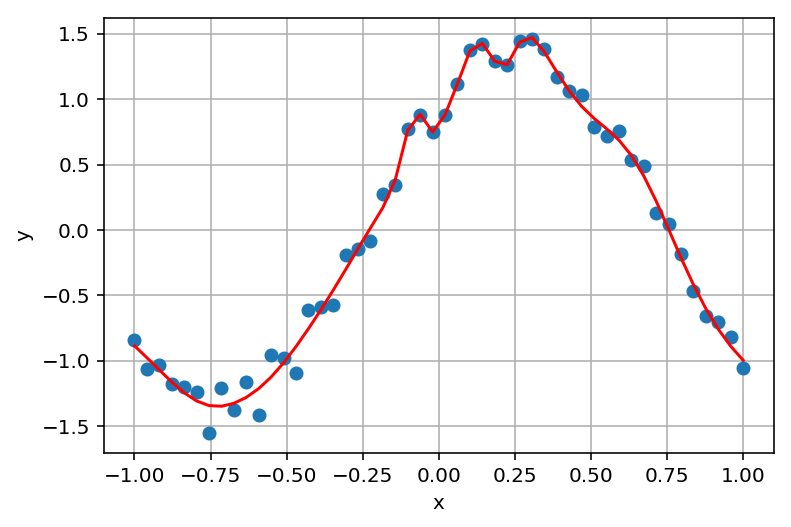

In [9]:
prediction = sess.run(model, feed_dict={x:features, y:labels.reshape(-1,1)})
plt.plot(xx, yy, 'o')
plt.plot(xx, prediction, '-r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Train/Test loss

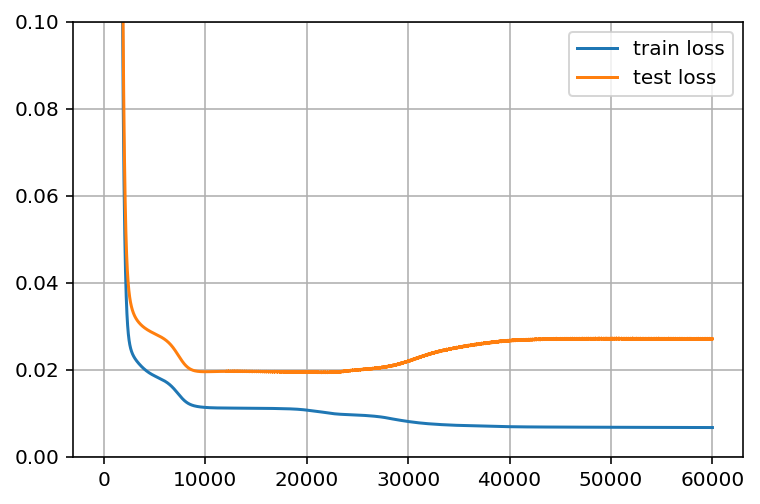

In [10]:
plt.plot(losses[:,0], label='train loss')
plt.plot(losses[:,1], label='test loss')
plt.grid()
plt.ylim([0, 0.1])
plt.legend()
plt.show()